<h3>A04_1</h3>
Imports

In [37]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
np.set_printoptions(linewidth=120)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
pi = np.pi

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Load and pre-process images

reading 0
reading 1
reading 2
reading 3
reading 4
reading 5
reading 6
reading 7
reading 8
reading 9
done


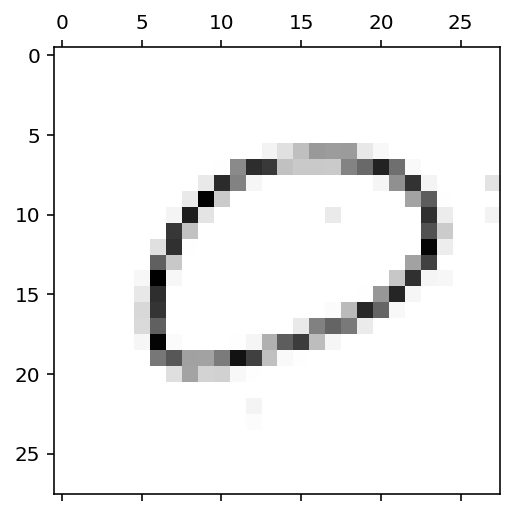

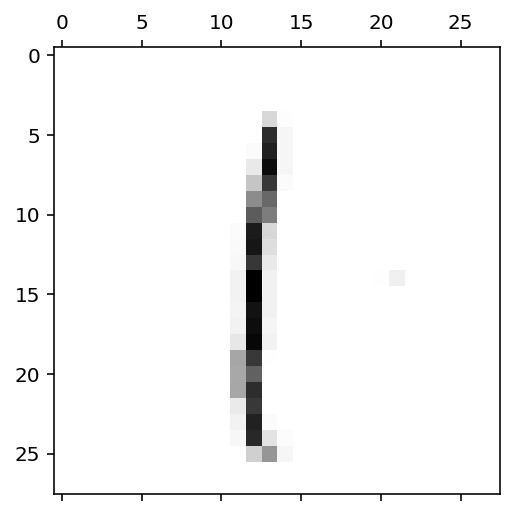

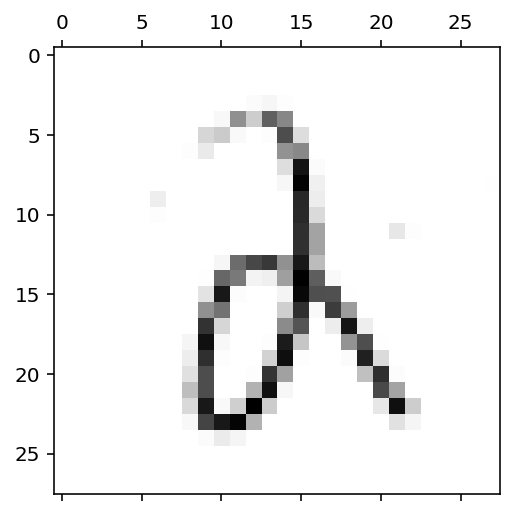

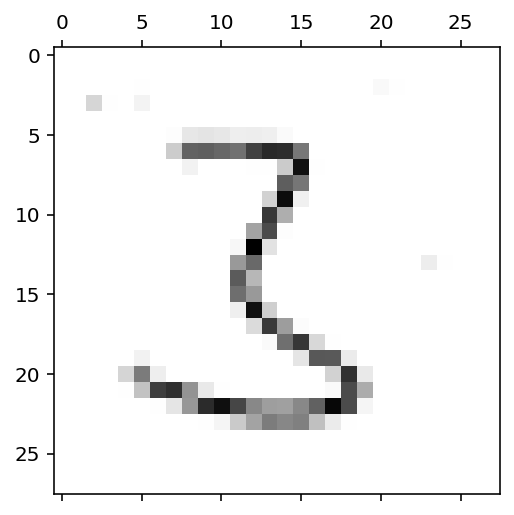

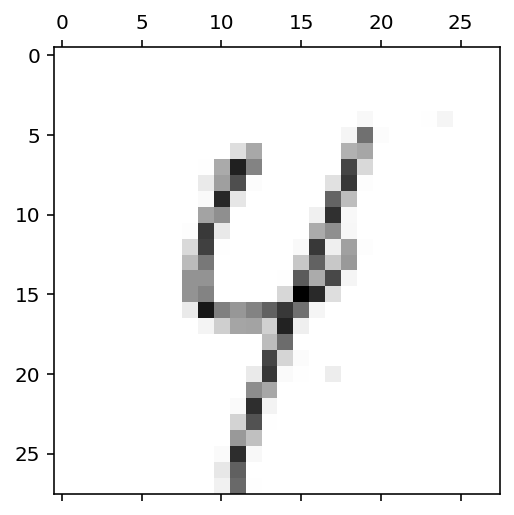

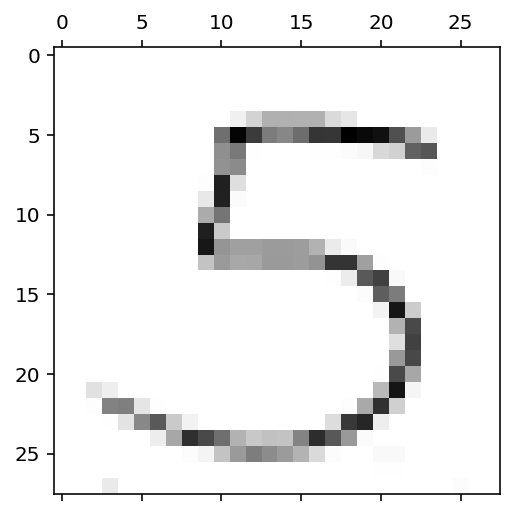

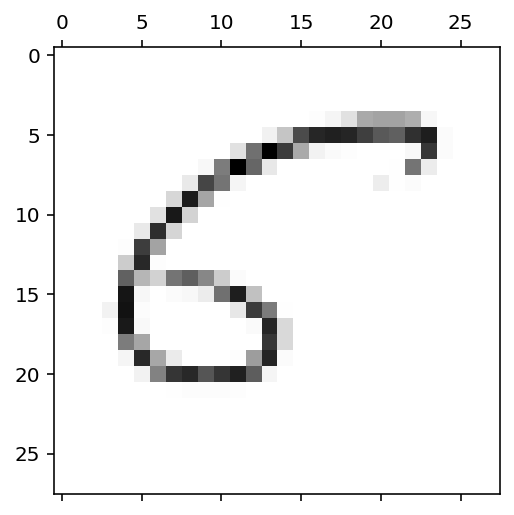

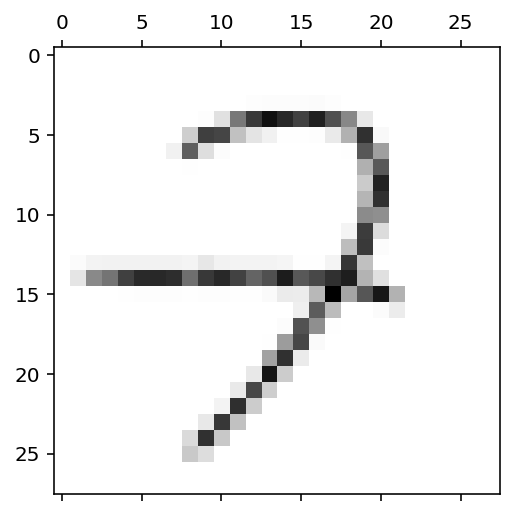

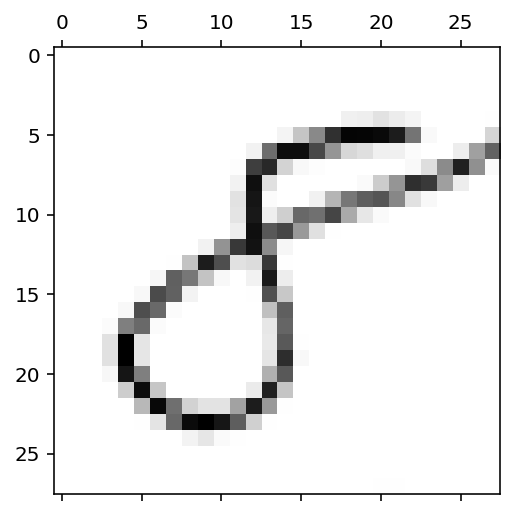

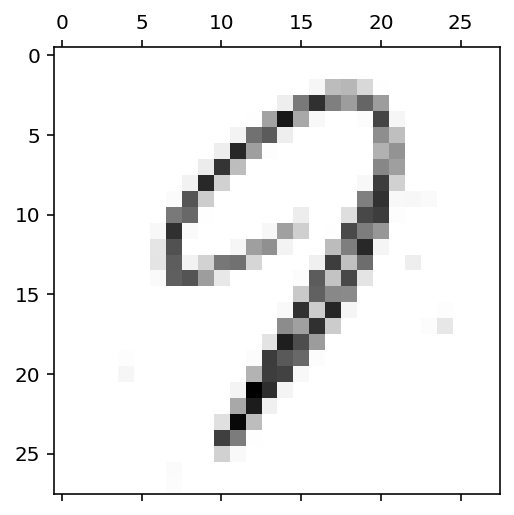

In [75]:
mydigits = []
yval = []
MNIST_len = 28

def gauss_2d(x,y,sigma):
    return np.exp(-(x**2+y**2)/(2*sigma**2))

def downsample(_image,_new_len):
    _sigma = 0.01
    _outimage = np.zeros((_new_len,_new_len))
    n_pix=np.shape(_image)[0]
    binratio = n_pix/_new_len
    relative_coord = []
    _image = np.pad(_image,(2,2),constant_values=0)
    for i in range(_new_len):
        for j in range(_new_len):
            xcent = 2+int(n_pix*i/_new_len)
            ycent = 2+int(n_pix*j/_new_len)
            for i_old in range(xcent-2,xcent+3):
                for j_old in range(ycent-2,ycent+3):
                    relx = i/_new_len - (i_old-2)/n_pix
                    rely = j/_new_len - (j_old-2)/n_pix
                    _outimage[i,j] += gauss_2d(relx,rely,_sigma)*_image[i_old,j_old]
    return _outimage
    

for i in range(10):
    yval.append(i)
    #read
    image = plt.imread(f'./my_digits/{i}.png')[:,:,1]
    image -= np.min(image)
    image /= np.max(image)
    image = 1-image

    #rectangularize
    shape = np.shape(image)
    xlen = shape[0]
    ylen = shape[1]
    dif = xlen-ylen
    if (dif > 0): #x > y
        padl = dif//2
        padr = dif - padl
        image = image[padl:xlen-padr,:]
    elif (dif < 0):
        padl = -dif//2
        padr = -dif - padl
        image = image[:,padl:ylen-padr]
    
    # downsample
    image = downsample(image,MNIST_len)
    image -= np.min(image)
    image /= np.max(image)
    plt.matshow(image,cmap='binary');
    mydigits.append(image)


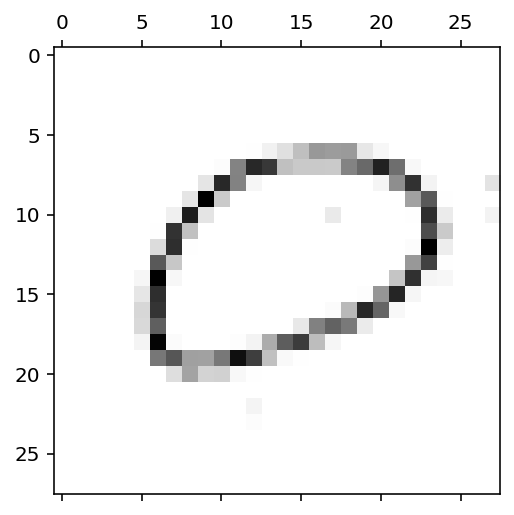

In [65]:
mydigits[0] -= np.min(mydigits[0])
mydigits[0] /= np.max(mydigits[0])
plt.matshow(mydigits[0],cmap='binary')